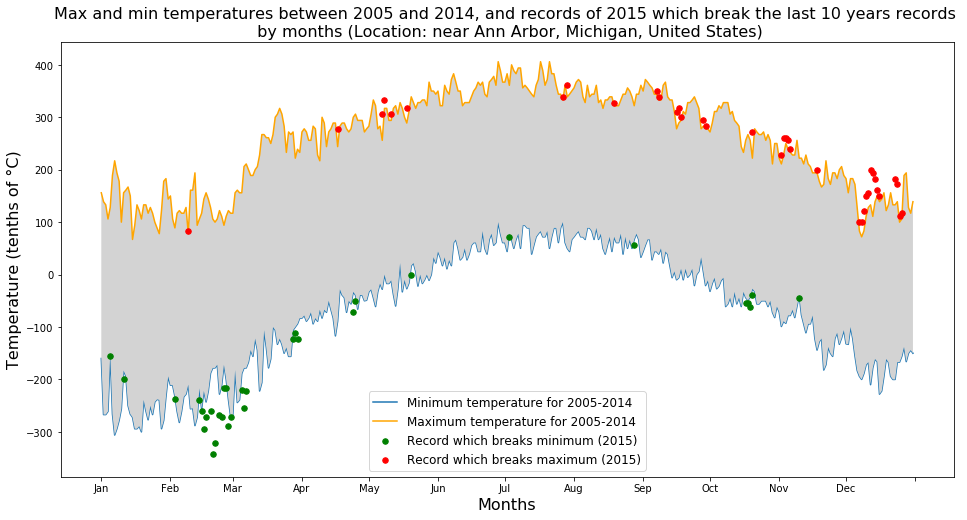

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data.csv')
df=df[~df['Date'].str.endswith('02-29')]
df2015=df[df['Date'].str.startswith('2015')]
df2015['month']=pd.DatetimeIndex(df2015['Date']).month
df2015['day']=pd.DatetimeIndex(df2015['Date']).day

df=df[df['Date'].str.startswith(tuple([str(i) for i in range(2005,2015)]))]
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

min=[]
max=[]
dt=[]
for i in df.groupby(['month','day']):   
    dt_m=str(i[0][0])
    dt_d=str(i[0][1])
    dt_md=dt_m+'-'+dt_d
    dt.append(dt_md)
    min.append(i[1]['Data_Value'].min())
    max.append(i[1]['Data_Value'].max())

dfnew=pd.DataFrame()
dfnew['Date']=dt
dfnew['Min']=min
dfnew['Max']=max
dfnew['Date'] = pd.to_datetime(dfnew['Date'], format='%m-%d')

min=[]
max=[]
dt=[]
for i in df2015.groupby(['month','day']):   
    dt_m=str(i[0][0])
    dt_d=str(i[0][1])
    dt_md=dt_m+'-'+dt_d
    dt.append(dt_md)
    min.append(i[1]['Data_Value'].min())
    max.append(i[1]['Data_Value'].max())
    
dfnew1=pd.DataFrame()
dfnew1['Date']=dt
dfnew1['Min']=min
dfnew1['Max']=max
dfnew1['Date'] = pd.to_datetime(dfnew1['Date'], format='%m-%d')

# print(type(dfnew['Date'].iloc[1]))
fig, ax = plt.subplots(figsize=(16,8))


df_all=pd.merge(dfnew,dfnew1,on='Date', how='left')
df_all.columns=['Date','period_min','period_max','2015_min','2015_max']
df_all['2015_min']=np.where(df_all['2015_min']<df_all['period_min'],df_all['2015_min'],np.nan)
df_all['2015_max']=np.where(df_all['2015_max']>df_all['period_max'],df_all['2015_max'],np.nan)

ax.plot(df_all['Date'], df_all['period_min'],zorder=0, label='Minimum temperature for 2005-2014')
ax.plot(df_all['Date'], df_all['period_max'],zorder=5, color='orange', label='Maximum temperature for 2005-2014')
ax.fill(np.append(df_all['Date'], df_all['Date'][::-1]), np.append(df_all['period_min'], df_all['period_max'][::-1]), 'lightgrey')

ax.scatter(df_all['Date'].tolist(), df_all['2015_min'].tolist(), color='green', s=30 ,zorder=10, label='Record which breaks minimum (2015)')
ax.scatter(df_all['Date'].tolist(), df_all['2015_max'].tolist(), color='red', s=30 ,zorder=10, label='Record which breaks maximum (2015)')

months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
formatter = mdates.DateFormatter("%m")
ax.xaxis.set_major_formatter(formatter)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# print(dfnew)
ax.set_xlabel('Months', fontsize=16)
ax.set_ylabel('Temperature (tenths of °C)', fontsize=16)
ax.set_title('Max and min temperatures between 2005 and 2014, and records of 2015 which break the last 10 years records \n by months (Location: near Ann Arbor, Michigan, United States)', fontsize=16)
ax.legend(fontsize=12)
plt.show()
fig.savefig('temp.jpg')